In [40]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
        
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns; sns.set()
%matplotlib inline


from sklearn.tree import DecisionTreeClassifier


from imblearn.pipeline import make_pipeline, Pipeline
from imblearn.over_sampling import SMOTE

from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import KBinsDiscretizer, FunctionTransformer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from category_encoders import WOEEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier


from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer, FunctionTransformer
from category_encoders import OneHotEncoder

from mlxtend.evaluate import feature_importance_permutation
from sklearn.model_selection import train_test_split

from mlxtend.feature_extraction import PrincipalComponentAnalysis
from mlxtend.preprocessing import standardize

from mlxtend.plotting import plot_pca_correlation_graph


from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import KBinsDiscretizer, FunctionTransformer
from sklearn.model_selection import cross_val_score

from sklearn.pipeline import make_pipeline, Pipeline

import joypy

from mlxtend.evaluate import feature_importance_permutation
from lofo import LOFOImportance, Dataset, plot_importance
from sklearn.model_selection import train_test_split, StratifiedKFold


import warnings
warnings.filterwarnings("ignore")
# Any results you write to the current directory are saved as output.

In [163]:
import pickle
import joblib

In [149]:
df = pd.read_csv('halftime_df.csv')
df.drop(['Unnamed: 0'],axis = 1, inplace=True)
labels = df.columns


In [3]:
df.head()

,Team,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,...,TOV,STL,BLK,PF,+/-,win_target,3_win_target,5_win_target,7_win_target,10_win_target
0,LAL,74,31,51,60.8,6,15,40.0,6,10,...,6,8,4,9,33,True,True,True,True,False
1,MIL,52,20,48,41.7,3,14,21.4,9,13,...,6,3,7,9,1,True,False,False,False,False
2,MIN,51,16,47,34.0,8,26,30.8,11,13,...,8,3,6,12,-1,False,False,False,False,False
3,NYK,51,22,51,43.1,4,14,28.6,3,6,...,5,0,4,12,3,True,True,True,True,True
4,ORL,62,23,51,45.1,8,18,44.4,8,8,...,4,7,3,11,4,True,True,True,True,True


### Set Up Spread Targets

In [4]:
win = 'win_target'
ptwin3 = '3_win_target'
ptwin5 = '5_win_target'
ptwin7 = '7_win_target'
ptwin10 = '10_win_target'
yw = df[win]
y3 = df[ptwin3]
y5 = df[ptwin5]
y7 = df[ptwin7]
y10 = df[ptwin10]

target_cols = ['win_target','3_win_target','5_win_target','7_win_target', '10_win_target']

In [5]:
yw

0        True
1        True
2       False
3        True
4        True
        ...  
1705     True
1706    False
1707    False
1708     True
1709     True
Name: win_target, Length: 1710, dtype: bool

In [7]:
df['Team'].isna().sum()

0

In [8]:
df['Team'].unique()

array(['LAL', 'MIL', 'MIN', 'NYK', 'ORL', 'PHX', 'POR', 'WAS', 'BKN',
       'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'IND', 'LAC',
       'MEM', 'MIA', 'OKC', 'SAC', 'SAS', 'TOR', 'UTA', 'ATL', 'BOS',
       'HOU', 'NOP', 'PHI'], dtype=object)

**Create Dictionary of Teams**

In [6]:
team_dict = {'ATL' : 0,
             'BKN' : 1,
             'BOS' : 2,
             'CHA' : 3,
             'CHI' : 4,
             'CLE' : 5,
             'DAL' : 6,
             'DEN' : 7,
             'DET' : 8,
             'GSW' : 9,
             'HOU' : 10,
             'IND' : 11,
             'LAC' : 12,
             'LAL' : 13,
             'MEM' : 14,
             'MIA' : 15,
             'MIL' : 16,
             'MIN' : 17,
             'NOP' : 18,
             'NYK' : 19,
             'OKC' : 20,
             'ORL' : 21,
             'PHI' : 22,
             'PHX' : 23,
             'POR' : 24,
             'SAC' : 25,
             'SAS' : 26,
             'TOR' : 27,
             'UTA' : 28,
             'WAS' : 29}

**Change Teams to Number Values**

In [150]:
df['Team'] = df['Team'].map(team_dict)
# df['Team1'] = df['Team1'].map(team_dict)
# df['Team2'] = df['Team2'].map(team_dict)

In [ ]:
df['Team2'].isna().sum()

In [8]:
df.head()

,Team,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,...,TOV,STL,BLK,PF,+/-,win_target,3_win_target,5_win_target,7_win_target,10_win_target
0,13,74,31,51,60.8,6,15,40.0,6,10,...,6,8,4,9,33,True,True,True,True,False
1,16,52,20,48,41.7,3,14,21.4,9,13,...,6,3,7,9,1,True,False,False,False,False
2,17,51,16,47,34.0,8,26,30.8,11,13,...,8,3,6,12,-1,False,False,False,False,False
3,19,51,22,51,43.1,4,14,28.6,3,6,...,5,0,4,12,3,True,True,True,True,True
4,21,62,23,51,45.1,8,18,44.4,8,8,...,4,7,3,11,4,True,True,True,True,True


## Create Naive Model

In [151]:
X = df.drop(target_cols,axis = 1)

In [152]:
X.head()

,Team,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,+/-
0,13,74,31,51,60.8,6,15,40.0,6,10,60.0,7,15,22,21,6,8,4,9,33
1,16,52,20,48,41.7,3,14,21.4,9,13,69.2,5,23,28,12,6,3,7,9,1
2,17,51,16,47,34.0,8,26,30.8,11,13,84.6,4,26,30,11,8,3,6,12,-1
3,19,51,22,51,43.1,4,14,28.6,3,6,50.0,5,23,28,15,5,0,4,12,3
4,21,62,23,51,45.1,8,18,44.4,8,8,100.0,6,16,22,11,4,7,3,11,4


In [11]:
X.columns

Index(['Team', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA',
       'FT%', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', '+/-'],
      dtype='object')

**Train Model and Test Accuracy on just Winning**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, yw, test_size=0.20)

In [13]:
scaler = MinMaxScaler()
lr = LogisticRegression()
model_w = make_pipeline(scaler, lr)

model_w.fit(X_train, y_train)

train_preds = model_w.predict(X_train)
test_preds = model_w.predict(X_test)

In [16]:
scores = cross_val_score(model_w, X, yw, cv=5, scoring='accuracy')
print(scores.mean(), "+/-", scores.std())

0.7175438596491229 +/- 0.023869393721588947


**Train Model and Test Accuracy on Winning by 3**

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y3, test_size=0.20)

In [154]:
X_train.columns.tolist()

['Team',
 'PTS',
 'FGM',
 'FGA',
 'FG%',
 '3PM',
 '3PA',
 '3P%',
 'FTM',
 'FTA',
 'FT%',
 'OREB',
 'DREB',
 'REB',
 'AST',
 'TOV',
 'STL',
 'BLK',
 'PF',
 '+/-']

In [155]:
scaler = MinMaxScaler()
lr = LogisticRegression()
model_3 = make_pipeline(scaler, lr)

model_3.fit(X_train, y_train)

train_preds = model_3.predict(X_train)
test_preds = model_3.predict(X_test)

In [156]:
scores = cross_val_score(model_3, X, y3, cv=5, scoring='accuracy')
print(scores.mean(), "+/-", scores.std())

0.7292397660818712 +/- 0.02485208112383133


**Train Model and Test Accuracy on Winning by 5**

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y5, test_size=0.20)

In [21]:
scaler = MinMaxScaler()
lr = LogisticRegression()
model_5 = make_pipeline(scaler, lr)

model_5.fit(X_train, y_train)

train_preds = model_5.predict(X_train)
test_preds = model_5.predict(X_test)

In [31]:
scores = cross_val_score(model_5, X, y5, cv=5, scoring='accuracy')
print(scores.mean(), "+/-", scores.std())

0.7304093567251462 +/- 0.020791098052200214


**Train Model and Test Accuracy on Winning by 7**

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y7, test_size=0.20)

In [24]:
scaler = MinMaxScaler()
lr = LogisticRegression()
model_7 = make_pipeline(scaler, lr)

model_7.fit(X_train, y_train)

train_preds = model_7.predict(X_train)
test_preds = model_7.predict(X_test)

In [32]:
scores = cross_val_score(model_7, X, y7, cv=5, scoring='accuracy')
print(scores.mean(), "+/-", scores.std())

0.7538011695906434 +/- 0.012182845997660608


**Train Model and Test Accuracy on Winning by 10**

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y10, test_size=0.20)

In [131]:
X_train.columns

Index(['Team', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA',
       'FT%', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', '+/-'],
      dtype='object')

In [27]:
scaler = MinMaxScaler()
lr = LogisticRegression()
model_10 = make_pipeline(scaler, lr)

model_10.fit(X_train, y_train)


train_preds = model_10.predict(X_train)
test_preds = model_10.predict(X_test)

In [33]:
scores = cross_val_score(model_10, X, y10, cv=5, scoring='accuracy')
print(scores.mean(), "+/-", scores.std())

0.8122807017543859 +/- 0.015405777628443858


**Save models**

In [ ]:
joblib.dump(model_w,'model_w.sav')
joblib.dump(model_3,'model_3.sav')
joblib.dump(model_5,'model_5.sav')
joblib.dump(model_7,'model_7.sav')
joblib.dump(model_10,'model_10.sav')

## Feature Importances

**This helps determine what features each model finds important**

In [93]:
# Model Exploration
class FeatureImportance():
    def __init__(
        self, model, feats=None, target='target', 
        test_size=0.25, scoring='accuracy', cv=5, random_state=42):
        self.model = model
        self.feats = feats
        self.target = target
        self.test_size = test_size
        self.scoring = scoring
        self.cv = cv
        self.random_state = random_state
        # permutation variables
        self.imp_vals = None
        self.imp_all = None
        self.std = None
        self.indices = None
        # leave-one-feature-out variables
        self.importance_df = None
    def permutation(self, X, y):
        if self.feats is None:
            self.feats = pd.DataFrame(X).columns.tolist()
        X_train, X_test, y_train, y_test = train_test_split(
            X[self.feats].values, y.values, 
            test_size=self.test_size, random_state=self.random_state, 
            stratify=y.values
        )
        # NOTE: If 'model' is a pipe that needs to select columns
        #  from a pandas dataframe object, this will break.
        self.model.fit(X_train, y_train)
        self.imp_vals, self.imp_all = feature_importance_permutation(
            predict_method=self.model.predict, 
            X=X_test,
            y=y_test,
            metric='accuracy',
            num_rounds=self.cv,
            seed=self.random_state)
        self.std = np.std(self.imp_all, axis=1)
        self.indices = np.argsort(self.imp_vals)[::-1]
        return self
    def loo(self, X, y, random=False):
        if self.feats is None:
            self.feats = pd.DataFrame(X).columns.tolist()
        # extract a sample of the data
        sample_df = pd.DataFrame(X[self.feats].values)
        sample_df.columns = self.feats
        sample_df[self.target] = y.values
        # inject a random variable and update "feats"
        if random:
            sample_df['random'] = np.random.normal(size=len(y))
            self.feats = [c for c in sample_df.columns.tolist() if c not in [self.target]]
        # define the validation scheme
        kfold = StratifiedKFold(n_splits=self.cv, 
                                random_state=self.random_state)
        # define the binary target and the features
        dataset = Dataset(df=sample_df, target=self.target, features=self.feats)
        # define the validation scheme and scorer. 
        lofo_imp = LOFOImportance(dataset, model=self.model, cv=kfold, scoring=self.scoring)
        # get importances mean/std in DataFrame
        self.importance_df = lofo_imp.get_importance()
        return self
    def permutation_report(self):
        plt.figure(figsize=(20,8))
        plt.title("Feature Importance via Permutation Importance")
        plt.bar(range(len(self.feats)),      # 
                self.imp_vals[self.indices], # 
                yerr=self.std[self.indices]) # 
        plt.xticks(range(len(self.feats)), 
                   np.array(self.feats)[self.indices])
        plt.xlim([-1, len(self.feats)])
        plt.ylim([0, self.imp_vals.max()*1.5])
        plt.tight_layout()
        plt.show()
    def loo_report(self):
        # plot the means and standard deviations of the importances
        plot_importance(self.importance_df, figsize=(12, 20))
    def threshold_report(self, X, y, z=1.0, max_iter=10):
        count = 0
        # initialize the stats
        means = self.importance_df.importance_mean
        stds = self.importance_df.importance_std
        ubs = means + z*stds
        key = (ubs > 0.0)
        # keep trying to reduce the features down while we still have "negative"
        # feature importances --judging by the (??) CI upper-bounds-- but only
        # for a max set of 10 iterations
        while (not key.all()) and (count < max_iter):
            # update the used features
            self.feats = self.importance_df[key]['feature'].tolist()
            self.loo(X, y)
            # update stats
            means = self.importance_df.importance_mean
            stds = self.importance_df.importance_std
            ubs = means + z*stds
            key = (ubs > 0.0)
            # increase the count
            count += 1
        self.loo_report()
    def noise_report(self, X, y):
        self.loo(X, y, True)
        self.loo_report()

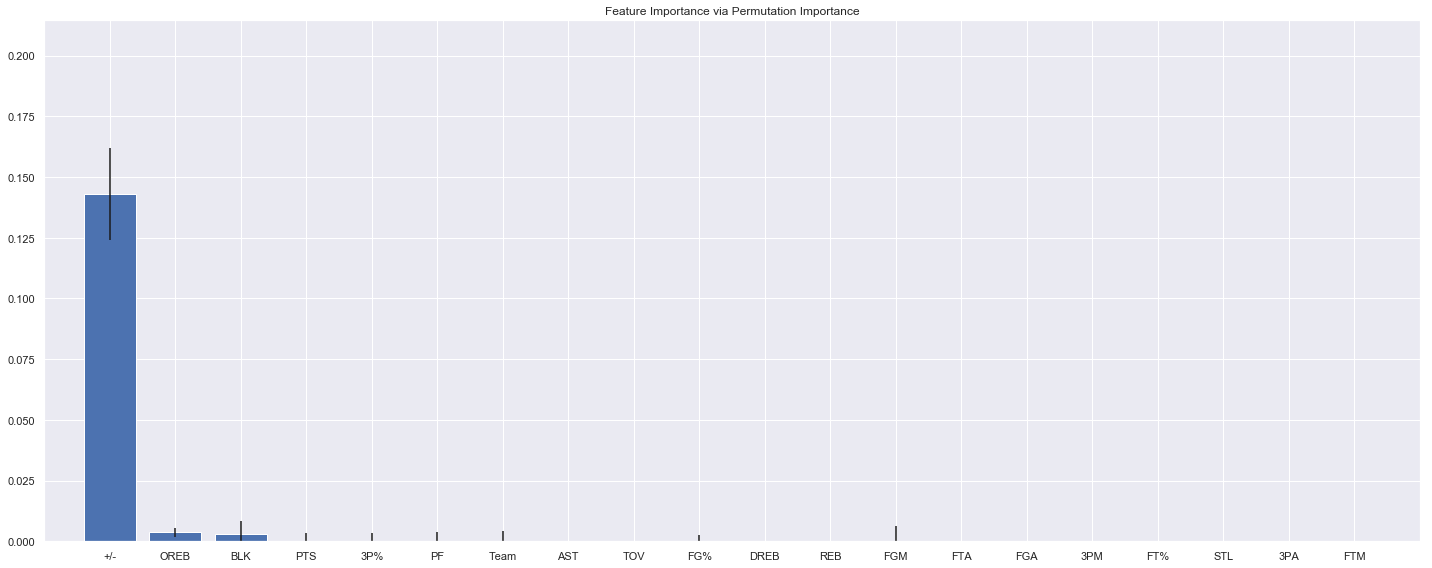

In [94]:
used_cols = ['Team', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA',
       'FT%', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', '+/-']

X = pd.DataFrame(X, columns=used_cols)

fi = FeatureImportance(model_3, feats=used_cols)
fi.permutation(pd.DataFrame(X, columns=used_cols), y3)
fi.permutation_report()

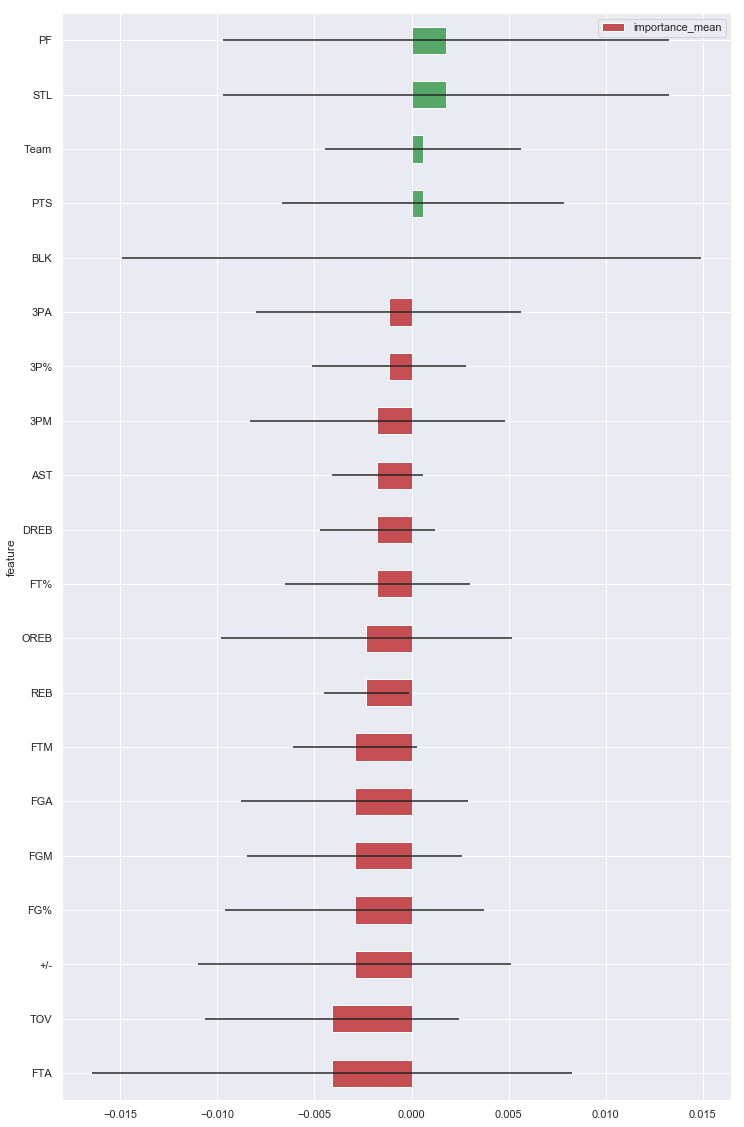

In [105]:
fi.loo(pd.DataFrame(X), y10)
fi.loo_report()

In [89]:
# fi.threshold_report(X, y3, z=0, max_iter=5)

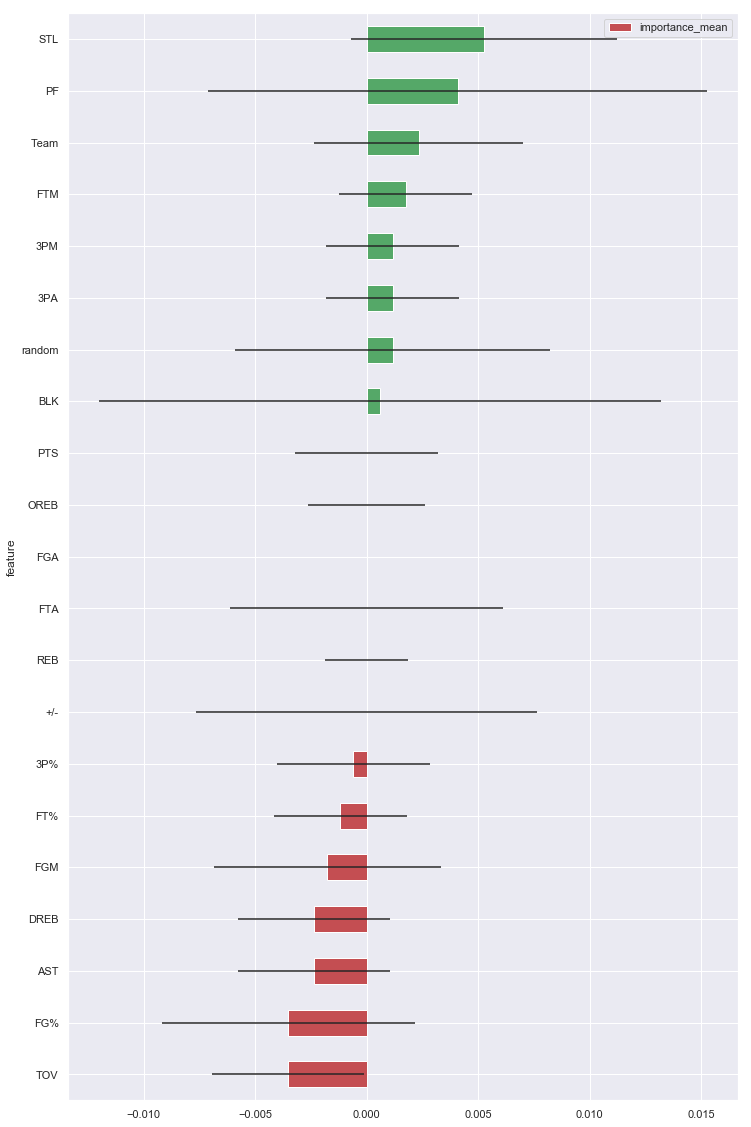

In [106]:
fi.noise_report(pd.DataFrame(X), y10)